After screening with graftM and phobius the uniref IDs were stored in UniRef_rhodopsin_clusters.txt as a list.

1. UniRef_rhodopsin_clusters.txt was used to retrieve the records from the web http://www.uniprot.org/uploadlists in compressed xml format. Only 542 out of 584 were retrieved.

2. Using command line tools:

`ggrep "<accession>\|<taxon>" UniRef_rhodopsin_clusters.xml | tr -d '\n' | gsed -e 's#</accession>##g' | gsed -e 's#</taxon>##g' | gsed -e 's#<taxon>#\t#g' | gsed -e 's#<accession>#\n#g' | gsed '/^$/d'> uniprot_7TM_tax.tsv` 

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load uniprot rhodopsin classification

In [8]:
columns = ["col_" + str(x) for x in range(12)]

In [9]:
columns = ['uniprot',
 'superkingdom',
 'phylum',
 'col_3',
 'col_4',
 'col_5',
 'col_6',
 'col_7',
 'col_8',
 'col_9',
 'col_10',
 'col_11']

In [10]:
uniprot_tax = pd.read_csv("./data/uniprot_analysis/uniref90/uniprot_7TM_tax.tsv", sep="\t", names=columns)

In [11]:
uniprot_tax.head()

,uniprot,superkingdom,phylum,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11
0,A0A2D6P7T7,Archaea,Candidatus Woesearchaeota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P33972,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,Halobacterium,NaN,NaN,NaN,NaN,NaN
2,F2Y2Z0,Viruses,"dsDNA viruses, no RNA stage",Phycodnaviridae,environmental samples,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A0A1L2YWD6,Bacteria,environmental samples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A0A1G7GXJ2,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Haloarculaceae,Halorientalis,NaN,NaN,NaN,NaN,NaN


In [12]:
#uniprot_tax = uniprot_tax.fillna(method="bfill")

In [13]:
uniprot_tax.superkingdom.value_counts()

Bacteria                  1577
Eukaryota                  912
Archaea                    489
Viruses                     46
unclassified sequences      13
Name: superkingdom, dtype: int64

## Load UniRef90 rhodopsin classification

In [14]:
rhod_uniref_file = './data/uniprot_analysis/uniref90/uniref90_rhodopsin_classification.tsv'
rhod_uniref = pd.read_csv(rhod_uniref_file, sep="\t", names=["UniRef90", "gg_classification"])

In [15]:
rhod_uniref.head()

,UniRef90,gg_classification
0,UniRef90_A0A1Z8LPR2,Root; k__type_1; p__1_1
1,UniRef90_A0A0S8KIK3,Root; k__helio; p__helio_6
2,UniRef90_Q1W8T6,Root; k__type_1; p__1_1
3,UniRef90_A0A166DMR3,Root; k__type_1; p__1_3
4,UniRef90_A0A1Z8P4Y6,Root; k__type_1; p__1_1


In [16]:
def rhod_type_parser(x):
    if ';' not in x:
        return "Unclassified"
    else:
        return x.split(";")[1][4:]

In [17]:
rhod_uniref["rhod_type"] = rhod_uniref["gg_classification"].apply(rhod_type_parser)

In [18]:
rhod_uniref.head()

,UniRef90,gg_classification,rhod_type
0,UniRef90_A0A1Z8LPR2,Root; k__type_1; p__1_1,type_1
1,UniRef90_A0A0S8KIK3,Root; k__helio; p__helio_6,helio
2,UniRef90_Q1W8T6,Root; k__type_1; p__1_1,type_1
3,UniRef90_A0A166DMR3,Root; k__type_1; p__1_3,type_1
4,UniRef90_A0A1Z8P4Y6,Root; k__type_1; p__1_1,type_1


## Load UniRef90 to uniprot mapping

In [19]:
uniref90_2_uniprot_file = "./data/uniprot_analysis/uniref90/uniprot_uniref90_hits_7TM.tab.gz"
uniref90_2_uniprot = pd.read_csv(uniref90_2_uniprot_file, sep="\t", names=["UniRef90", "uniprot"], skiprows=1)

In [20]:
uniref90_2_uniprot.head()

,UniRef90,uniprot
0,UniRef90_A0A2E8RDW7,A0A2E8RBH8
1,UniRef90_Q2Q0F3,A0A2E1QER1
2,UniRef90_A0A1L2YW40,A0A2E2U2T9
3,UniRef90_A0A1L2YW89,A0A2E1FYI8
4,UniRef90_A0A249KS24,G9AY65


## Merge DFs

In [42]:
uniprot_df = uniprot_tax.merge(uniref90_2_uniprot, on="uniprot", how="left")

In [43]:
uniprot_df = uniprot_df.merge(rhod_uniref[["UniRef90", "rhod_type"]], on="UniRef90", how="left")

In [44]:
uniprot_df.head()

,uniprot,superkingdom,phylum,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,UniRef90,rhod_type
0,A0A2D6P7T7,Archaea,Candidatus Woesearchaeota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UniRef90_A0A2D6P7T7,type_1
1,P33972,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,Halobacterium,NaN,NaN,NaN,NaN,NaN,UniRef90_P94854,type_1
2,F2Y2Z0,Viruses,"dsDNA viruses, no RNA stage",Phycodnaviridae,environmental samples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UniRef90_F2Y2Z0,type_1
3,A0A1L2YWD6,Bacteria,environmental samples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UniRef90_A0A1L2YWD6,type_1
4,A0A1G7GXJ2,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Haloarculaceae,Halorientalis,NaN,NaN,NaN,NaN,NaN,UniRef90_A0A1G7GXJ2,type_1


In [45]:
# We keep only those entries with rhod classification
rhod_df = uniprot_df.loc[~uniprot_df["rhod_type"].isnull()]


In [47]:
rhod_df.head()

,uniprot,superkingdom,phylum,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,UniRef90,rhod_type
0,A0A2D6P7T7,Archaea,Candidatus Woesearchaeota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UniRef90_A0A2D6P7T7,type_1
1,P33972,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Halobacteriaceae,Halobacterium,NaN,NaN,NaN,NaN,NaN,UniRef90_P94854,type_1
2,F2Y2Z0,Viruses,"dsDNA viruses, no RNA stage",Phycodnaviridae,environmental samples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UniRef90_F2Y2Z0,type_1
3,A0A1L2YWD6,Bacteria,environmental samples,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UniRef90_A0A1L2YWD6,type_1
4,A0A1G7GXJ2,Archaea,Euryarchaeota,Halobacteria,Halobacteriales,Haloarculaceae,Halorientalis,NaN,NaN,NaN,NaN,NaN,UniRef90_A0A1G7GXJ2,type_1


In [50]:
#add plot_classification
sup_table_df = rhod_df[["uniprot", "UniRef90","rhod_type", "superkingdom", "phylum"]].copy()

In [ ]:
rhod_df = rhod_df[["uniprot", "rhod_type", "superkingdom", "phylum"]]

In [25]:
rhod_df.shape

(3050, 4)

In [26]:
rhod_df = rhod_df.loc[~rhod_df["superkingdom"].isnull()]

In [41]:
rhod_df.head()

,uniprot,rhod_type,superkingdom,phylum
0,A0A2D6P7T7,type_1,Archaea,Candidatus Woesearchaeota
1,P33972,type_1,Archaea,Euryarchaeota
2,F2Y2Z0,type_1,Viruses,"dsDNA viruses, no RNA stage"
3,A0A1L2YWD6,type_1,Bacteria,environmental samples
4,A0A1G7GXJ2,type_1,Archaea,Euryarchaeota


In [27]:
rhod_df.shape

(3037, 4)

In [28]:
rhod_df["rhod_type"].value_counts()

type_1          2646
helio            372
Unclassified      19
Name: rhod_type, dtype: int64

In [29]:
rhod_df["superkingdom"].value_counts()

Bacteria                  1577
Eukaryota                  912
Archaea                    489
Viruses                     46
unclassified sequences      13
Name: superkingdom, dtype: int64

In [30]:
rhod_df.head()

,uniprot,rhod_type,superkingdom,phylum
0,A0A2D6P7T7,type_1,Archaea,Candidatus Woesearchaeota
1,P33972,type_1,Archaea,Euryarchaeota
2,F2Y2Z0,type_1,Viruses,"dsDNA viruses, no RNA stage"
3,A0A1L2YWD6,type_1,Bacteria,environmental samples
4,A0A1G7GXJ2,type_1,Archaea,Euryarchaeota


In [31]:
# rhod_df.to_csv("./results/uniref50_2018_05_rhod_classification.tsv", sep="\t", columns=["uniprot", "rhod_classification", "superkingdom", "phylum"], index=False)

In [32]:
classification_phylum = rhod_df[["rhod_type", "superkingdom","phylum"]].copy()

In [33]:
#classification_phylum.loc[classification_phylum["phylum"]=="environmental samples"]

In [34]:
classification_phylum.loc[classification_phylum["phylum"].isnull(), "phylum"] = "Unclassified_Bact"

In [35]:
classification_phylum.loc[~classification_phylum["phylum"].isnull()].phylum.unique()

array(['Candidatus Woesearchaeota', 'Euryarchaeota',
       'dsDNA viruses, no RNA stage', 'environmental samples',
       'Candidatus Nanohaloarchaeota', 'Candidatus Marinimicrobia',
       'Unclassified_Bact', 'Actinobacteria', 'Bacteroidetes',
       'Proteobacteria', 'Cyanobacteria', 'Chloroflexi', 'Cryptophyta',
       'Firmicutes', 'Haloplasmatales', 'Viridiplantae', 'Spirochaetes',
       'Rhodothermaeota', 'Gemmatimonadetes', 'Amoebozoa', 'Fungi',
       'Verrucomicrobia', 'Deinococcus-Thermus', 'Planctomycetes',
       'metagenomes', 'Asgard group', 'Alveolata', 'Haptophyceae',
       'Thermotogae', 'Candidatus Berkelbacteria', 'Chlamydiae',
       'Candidatus Dojkabacteria', 'Candidatus Saccharibacteria',
       'Candidatus Bathyarchaeota', 'Tenericutes',
       'Candidatus Kerfeldbacteria', 'candidate division WWE3',
       'Balneolaeota', 'Thaumarchaeota', 'Caldiserica',
       'candidate division WS2', 'candidate division CPR3',
       'Acidobacteria', 'Stramenopiles', 'Ap

In [36]:
classification_phylum = classification_phylum.loc[classification_phylum["phylum"] != 'environmental samples']

In [37]:
classification_phylum = classification_phylum.loc[classification_phylum["superkingdom"] != 'unclassified sequences']

In [38]:
# add "virus" phylum
classification_phylum.loc[classification_phylum.superkingdom == 'Viruses', 'phylum'] = "Viruses"
# add euks
classification_phylum.loc[classification_phylum.superkingdom == 'Eukaryota', 'phylum'] = "Eukaryotes"
# add unclassified "phylum"
classification_phylum.loc[classification_phylum.superkingdom == 'unclassified sequences', 'phylum'] = "Unclassified"

In [39]:
#classification_phylum = classified[["rhod_classification", "phylum","full_tax"]].copy()

In [40]:
classification_phylum.head()

,rhod_type,superkingdom,phylum
0,type_1,Archaea,Candidatus Woesearchaeota
1,type_1,Archaea,Euryarchaeota
2,type_1,Viruses,Viruses
4,type_1,Archaea,Euryarchaeota
5,type_1,Archaea,Euryarchaeota


In [34]:
classification_phylum = classification_phylum.\
groupby(["rhod_type", "phylum"]).agg(len)

In [35]:
classification_phylum.reset_index(inplace=True)

In [36]:
classification_phylum.rename(columns={"superkingdom":"count"}, inplace=True)

In [37]:
rhodopsin_phylum_count = classification_phylum.groupby('rhod_type').agg(sum)

In [38]:
rhodopsin_phylum_count

,count
rhod_type,
Unclassified,19
helio,365
type_1,2440


classification_phylum['phylum'] = classification_phylum['phylum'].replace('Candidatus Heimdallarchaeota', 'Asgard')

classification_phylum['phylum'] = classification_phylum['phylum'].replace('Candidatus Marinimicrobia', 'Candidatus\nMarinimicrobia')

In [39]:
taxa = classification_phylum.phylum.unique()

In [41]:
# add missing taxa
for rhod_type in ['helio', 'type_1']:
    for tax in taxa:
        if tax not in classification_phylum[(classification_phylum.rhod_type == rhod_type)]['phylum'].unique():
            classification_phylum = classification_phylum.append({'rhod_type':rhod_type, 'phylum':tax, 'count':0}, ignore_index=True)
classification_phylum.sort_values(by='phylum', inplace=True)

### Calculate percentage

In [42]:
classification_phylum.loc[classification_phylum['rhod_type'] == 'helio', '%'] = \
classification_phylum.loc[classification_phylum['rhod_type'] == 'helio', 'count']*100/rhodopsin_phylum_count.loc['helio','count']

In [43]:
classification_phylum.loc[classification_phylum['rhod_type'] == 'type_1', '%'] = \
classification_phylum.loc[classification_phylum['rhod_type'] == 'type_1', 'count']*100/rhodopsin_phylum_count.loc['type_1','count']

In [44]:
classification_phylum = classification_phylum.loc[classification_phylum["rhod_type"] != "Unclassified"]

---

In [47]:
# gram negative

diderm = ['Proteobacteria',
 'Aquificae',
 'Chlamydiae',
 'Bacteroidetes',
 'Chlorobi',
 'Cyanobacteria',
 'Fibrobacteres',
 'Verrucomicrobia',
 'Planctomycetes',
 'Spirochetes',
 'Acidobacteria',
 'Gemmatimonadetes',
 'Spirochaetes',
 'Balneolaeota',
 'Rhodothermaeota','Caldiserica']

In [48]:
#gram positive
monoderm = ['Actinobacteria',
 'Firmicutes',
 'Thermotogae',
 'Chloroflexi',
 'Tenericutes',
 'Haloplasmatales',
 'Deinococcus-Thermus']

In [49]:
archaea = ["Euryarchaeota", "Asgard group", "Thaumarchaeota"]

In [50]:
candidatus_archaea = ['Candidatus Bathyarchaeota', 'Candidatus Nanohaloarchaeota', 'Candidatus Woesearchaeota']

In [51]:
candidatus_bacteria = ['Candidatus Berkelbacteria',
       'Candidatus Dojkabacteria', 'Candidatus Kerfeldbacteria',
       'Candidatus Levybacteria', 'Candidatus Marinimicrobia','Candidatus Saccharibacteria', 'Candidatus Woykebacteria',
       'candidate division WS2', 'candidate division WWE3','candidate division CPR3', 'Unclassified_Bac', 'Unclassified_Bact']

In [52]:
classification_phylum.loc[classification_phylum["phylum"].isin(diderm), "plot_classification"] = "Diderm"

In [53]:
classification_phylum.loc[classification_phylum["phylum"].isin(monoderm), "plot_classification"] = "Monoderm"

In [54]:
classification_phylum.loc[classification_phylum["phylum"].isin(archaea), "plot_classification"] = "Archaea"

In [55]:
classification_phylum.loc[classification_phylum["phylum"].isin(candidatus_archaea), "plot_classification"] = "Unclassified_Archaea"

In [56]:
classification_phylum.loc[classification_phylum["phylum"].isin(candidatus_bacteria), "plot_classification"] = "Unclassified_Bacteria"

In [57]:
classification_phylum.loc[classification_phylum["phylum"] == "Viruses", "plot_classification"] = "Viruses"

In [58]:
classification_phylum.loc[classification_phylum["phylum"] == "Eukaryotes", "plot_classification"] = "Eukaryotes"

In [59]:
classification_phylum.loc[(classification_phylum["plot_classification"]=="Diderm") & (classification_phylum["rhod_type"]=="helio") & (classification_phylum["count"] > 0)]

,rhod_type,phylum,count,%,plot_classification
7,helio,Bacteroidetes,1,0.273973,Diderm
8,helio,Caldiserica,1,0.273973,Diderm
18,helio,Planctomycetes,1,0.273973,Diderm
19,helio,Proteobacteria,5,1.369863,Diderm
20,helio,Rhodothermaeota,1,0.273973,Diderm
21,helio,Spirochaetes,1,0.273973,Diderm
25,helio,Verrucomicrobia,1,0.273973,Diderm


### Plot parameters

In [60]:
a4_dims = (11.7, 8.27)
color_dict = {'helio':"#7137c8", 'type_1':"gray"}

In [71]:
classification_plot_count_df

,count
rhod_type,
helio,365
type_1,2440


In [72]:
classification_plot

,rhod_type,plot_classification,count,%
4,helio,Unclassified_Archaea,2,0.547945
2,helio,Eukaryotes,9,2.465753
1,helio,Diderm,11,3.013699
5,helio,Unclassified_Bacteria,29,7.945205
6,helio,Viruses,41,11.232877
0,helio,Archaea,61,16.712329
3,helio,Monoderm,212,58.082192
13,type_1,Viruses,5,0.204918
11,type_1,Unclassified_Archaea,9,0.368852
12,type_1,Unclassified_Bacteria,37,1.516393


---

In [73]:
phylum_to_classification = classification_phylum[['phylum', 'plot_classification']].sort_values(by="phylum").drop_duplicates('phylum')

In [74]:
rhod_df_2 = rhod_df.merge(phylum_to_classification, how='left')

In [75]:
rhod_df_2.loc[rhod_df_2['superkingdom'] == "Viruses", "plot_classification"] = "Viruses"
rhod_df_2.loc[rhod_df_2['superkingdom'] == "Eukaryota", "plot_classification"] = "Eukaryotes"

To retrieve the DNA sequences were the diderm helios come from we generate a string to be used in the UniProt "Retrieve/ID mapping" section:

In [76]:
diderm_helios = rhod_df_2.loc[(rhod_df_2['rhod_type'] == "helio") & (rhod_df_2['plot_classification'] == "Diderm")]

In [77]:
" ".join(rhod_df_2.loc[(rhod_df_2['rhod_type'] == "helio") & (rhod_df_2['plot_classification'] == "Diderm")]["uniprot"].unique())

'A0A2E6VS27 A0A2D5VLF3 A0A0S8KIK3 A0A2J6WFT3 A0A2N1RF51 A0A2E8P9U3 A0A2D9B3I5 A0A2E5JDM4 A0A2D7RE61 A0A1Z9VIQ1 A0A2E4IYC1'

We retrieve the results:

In [78]:
!curl "http://www.uniprot.org/mapping/M20180612E29AEE828664DEEC55715D2BCC1634E10E26C49.tab" > ./data/uniprot_analysis/uniref90/uniprot_20180612_diderm_helios.tsv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   272  100   272    0     0    701      0 --:--:-- --:--:-- --:--:--   702


In [79]:
diderm_helios_genbank = pd.read_csv("./data/uniprot_analysis/uniref90/uniprot_20180612_diderm_helios.tsv", sep="\t", names=["uniprot", "GenBank"], skiprows=1)

In [80]:
diderm_helios_genbank.head()

,uniprot,GenBank
0,A0A2E6VS27,PBLQ01000024
1,A0A2D5VLF3,NYYR01000026
2,A0A0S8KIK3,LJVF01000126
3,A0A2J6WFT3,PNIL01000013
4,A0A2N1RF51,PGXQ01000178


In [81]:
diderm_helios.merge(diderm_helios_genbank, how="left")

,uniprot,rhod_type,superkingdom,phylum,plot_classification,GenBank
0,A0A2E6VS27,helio,Bacteria,Proteobacteria,Diderm,PBLQ01000024
1,A0A2D5VLF3,helio,Bacteria,Proteobacteria,Diderm,NYYR01000026
2,A0A0S8KIK3,helio,Bacteria,Planctomycetes,Diderm,LJVF01000126
3,A0A2J6WFT3,helio,Bacteria,Caldiserica,Diderm,PNIL01000013
4,A0A2N1RF51,helio,Bacteria,Spirochaetes,Diderm,PGXQ01000178
5,A0A2E8P9U3,helio,Bacteria,Rhodothermaeota,Diderm,PBTV01000036
6,A0A2D9B3I5,helio,Bacteria,Proteobacteria,Diderm,NZPZ01000075
7,A0A2E5JDM4,helio,Bacteria,Bacteroidetes,Diderm,PBCE01000032
8,A0A2D7RE61,helio,Bacteria,Proteobacteria,Diderm,NZIM01000046
9,A0A1Z9VIQ1,helio,Bacteria,Proteobacteria,Diderm,NHMA01000017


After manual classification based on blast results from other proteins inside the same contig/genome

In [98]:
# diderm_helios_manual_tax = pd.read_clipboard()
# diderm_helios_manual_tax.to_csv("./data/uniprot_analysis/uniref90/uniprot_20180612_diderm_helios_manual_tax.tsv", sep="\t", index=False)

In [99]:
diderm_helios_manual_tax = pd.read_csv("./data/uniprot_analysis/uniref90/uniprot_20180612_diderm_helios_manual_tax.tsv", sep="\t")

In [100]:
diderm_helios_manual_tax

,uniprot,phylum,plot_classification
0,A0A2E6VS27,Actinobacteria,Monoderm
1,A0A2D5VLF3,probable_phage,Unclassified
2,A0A0S8KIK3,Chloroflexi,Monoderm
3,A0A2J6WFT3,archaea/actinobacteria,Unclassified
4,A0A2N1RF51,actinobacteria/proteobacteria/spirochaetes,Unclassified_Bacteria
5,A0A2E8P9U3,Actinobacteria,Monoderm
6,A0A2D9B3I5,Actinomarina,Monoderm
7,A0A2E5JDM4,Euk/candidatus_bacteria,Unclassified
8,A0A2D7RE61,Euk/virus,Unclassified
9,A0A1Z9VIQ1,Euk/virus,Unclassified


In [101]:
# replace tax and plot_classification
diderm_helios_manual_tax = diderm_helios_manual_tax.merge(diderm_helios[["uniprot", "superkingdom", "rhod_type"]], on="uniprot", how="left")

In [102]:
diderm_helios_manual_tax

,uniprot,phylum,plot_classification,superkingdom,rhod_type
0,A0A2E6VS27,Actinobacteria,Monoderm,Bacteria,helio
1,A0A2D5VLF3,probable_phage,Unclassified,Bacteria,helio
2,A0A0S8KIK3,Chloroflexi,Monoderm,Bacteria,helio
3,A0A2J6WFT3,archaea/actinobacteria,Unclassified,Bacteria,helio
4,A0A2N1RF51,actinobacteria/proteobacteria/spirochaetes,Unclassified_Bacteria,Bacteria,helio
5,A0A2E8P9U3,Actinobacteria,Monoderm,Bacteria,helio
6,A0A2D9B3I5,Actinomarina,Monoderm,Bacteria,helio
7,A0A2E5JDM4,Euk/candidatus_bacteria,Unclassified,Bacteria,helio
8,A0A2D7RE61,Euk/virus,Unclassified,Bacteria,helio
9,A0A1Z9VIQ1,Euk/virus,Unclassified,Bacteria,helio


In [103]:
rhod_df_2 = pd.concat([rhod_df_2.loc[~rhod_df_2.uniprot.isin(diderm_helios["uniprot"])], diderm_helios_manual_tax], sort=False)

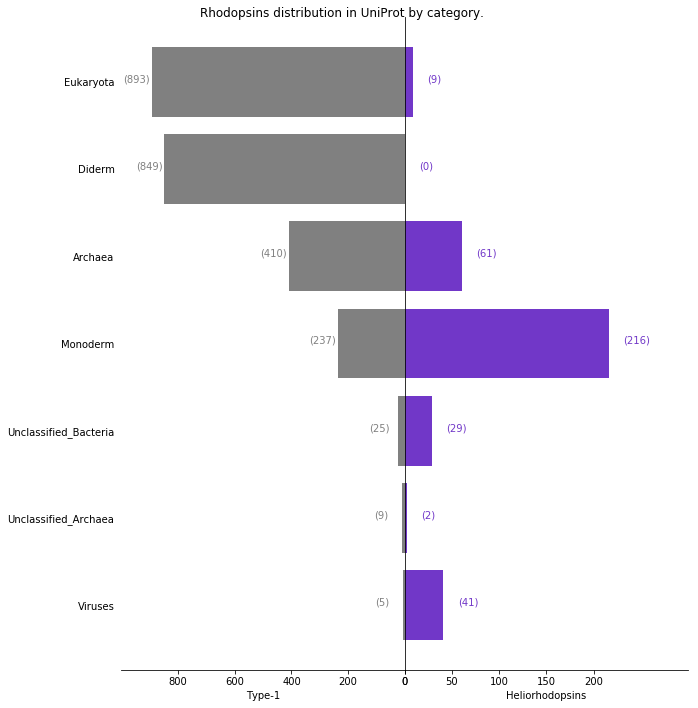

In [357]:
plot_df = rhod_df_2

plot_df = plot_df.loc[~plot_df.plot_classification.isnull()]
plot_df = plot_df.loc[plot_df.rhod_type != "Unclassified"]
plot_df = plot_df.loc[~plot_df.plot_classification.isin(["Unclassified"])]

# Count occurrence per category
plot_df = plot_df[["rhod_type", "plot_classification", "uniprot"]].\
groupby(["rhod_type", "plot_classification"]).\
agg(len).reset_index().sort_values('uniprot').\
rename(columns={'uniprot':'count'})


# add missing taxa
for rhod_type in ['helio', 'type_1']:
    for classification in plot_df.plot_classification.unique():
        if classification not in plot_df[(plot_df.rhod_type == rhod_type)]['plot_classification'].unique():
            plot_df = plot_df.append({'rhod_type':rhod_type, 'plot_classification':classification, 'count':0}, ignore_index=True)

classification_plot = plot_df

# count total number of helios from each type
classification_plot_count_df = classification_plot.groupby('rhod_type').agg(sum).reset_index().set_index('rhod_type')

# Calculate %
classification_plot.loc[classification_plot['rhod_type'] == 'helio', '%'] = \
classification_plot.loc[classification_plot['rhod_type'] == 'helio', 'count']*100/classification_plot_count_df.loc['helio','count']

classification_plot.loc[classification_plot['rhod_type'] == 'type_1', '%'] = \
classification_plot.loc[classification_plot['rhod_type'] == 'type_1', 'count']*100/classification_plot_count_df.loc['type_1','count']

# Sort DF
classification_plot.sort_values(by=["rhod_type", "count"], ascending=True, inplace=True)

# order of categories
categories = classification_plot.loc[classification_plot.rhod_type == "type_1"].sort_values(by="count", ascending=True)["plot_classification"].tolist()

classification_plot['plot_cat'] = pd.Categorical(classification_plot['plot_classification'], categories=categories, ordered=True)

classification_plot = classification_plot.sort_values('plot_cat')

g = sns.FacetGrid(data=classification_plot, \
                  col="rhod_type", \
                  hue="rhod_type", \
                  sharex=False, sharey=True, size=10, aspect=.5,palette=color_dict, col_order=["type_1", "helio"])
g = (g.map(plt.barh, "plot_classification", "count").set_titles(""))


g.fig.subplots_adjust(hspace=0, wspace=0)

# axis containers
helio_ax = g.axes[0][1]
type1_ax = g.axes[0][0]

# # set x axis ticks
type1_ax.set_xticks([0,200,400,600,800]);
helio_ax.set_xticks([0,50,100,150,200]);

# #set labels
helio_ax.set_ylabel('')
type1_ax.set_ylabel('')
helio_ax.set_xlabel('Heliorhodopsins');
type1_ax.set_xlabel('Type-1');

#modify xlim to fit the labels
type1_ax.set_xlim(0,1000)
helio_ax.set_xlim(0,300)
#annotate the bars
for p in helio_ax.patches:
    helio_ax.annotate("({})".format(p.get_width()), \
                      (p.get_width()+15, p.get_xy()[1]+(p.get_height())/2), color='#7137c8')
for p in type1_ax.patches:
    type1_ax.annotate("({})".format(p.get_width()), \
                      (int(p.get_width())+100, p.get_xy()[1]+(p.get_height())/2), color='gray')

# invert x axis on helios
type1_ax.invert_xaxis()

sns.despine(ax=type1_ax,left=True)

# #remove ticks
type1_ax.yaxis.set_ticks_position('none')
helio_ax.yaxis.set_ticks_position('none')

g.fig.suptitle('Rhodopsins distribution in UniProt by category.');

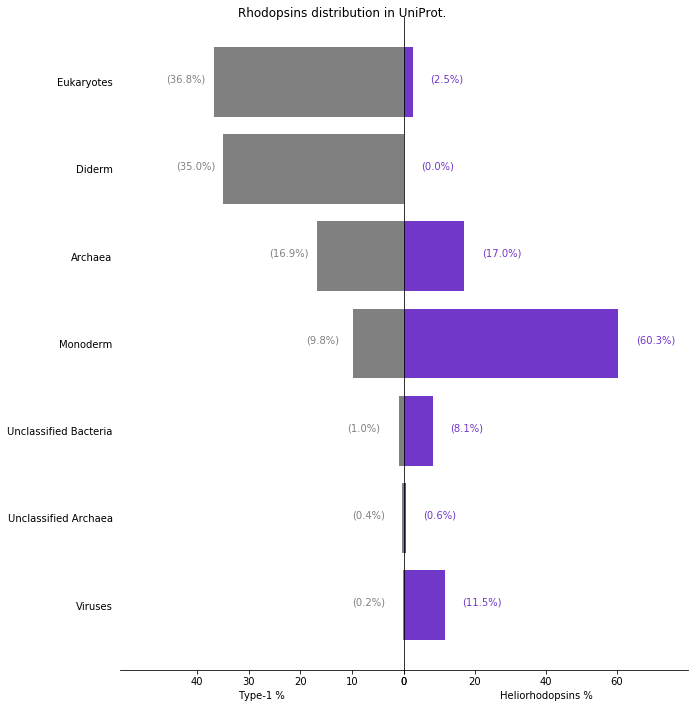

In [406]:
plot_df = rhod_df_2

plot_df = plot_df.loc[~plot_df.plot_classification.isnull()]
plot_df = plot_df.loc[plot_df.rhod_type != "Unclassified"]
plot_df = plot_df.loc[~plot_df.plot_classification.isin(["Unclassified"])]

# Count occurrence per category
plot_df = plot_df[["rhod_type", "plot_classification", "uniprot"]].\
groupby(["rhod_type", "plot_classification"]).\
agg(len).reset_index().sort_values('uniprot').\
rename(columns={'uniprot':'count'})


# add missing taxa
for rhod_type in ['helio', 'type_1']:
    for classification in plot_df.plot_classification.unique():
        if classification not in plot_df[(plot_df.rhod_type == rhod_type)]['plot_classification'].unique():
            plot_df = plot_df.append({'rhod_type':rhod_type, 'plot_classification':classification, 'count':0}, ignore_index=True)

plot_df.plot_classification.replace("Unclassified_Archaea", "Unclassified Archaea", inplace=True)
plot_df.plot_classification.replace("Unclassified_Bacteria", "Unclassified Bacteria", inplace=True)
plot_df.plot_classification.replace("Eukaryota", "Eukaryotes", inplace=True)
            
classification_plot = plot_df

# count total number of helios from each type
classification_plot_count_df = classification_plot.groupby('rhod_type').agg(sum).reset_index().set_index('rhod_type')

# Calculate %
classification_plot.loc[classification_plot['rhod_type'] == 'helio', '%'] = \
classification_plot.loc[classification_plot['rhod_type'] == 'helio', 'count']*100/classification_plot_count_df.loc['helio','count']

classification_plot.loc[classification_plot['rhod_type'] == 'type_1', '%'] = \
classification_plot.loc[classification_plot['rhod_type'] == 'type_1', 'count']*100/classification_plot_count_df.loc['type_1','count']

# Sort DF
classification_plot.sort_values(by=["rhod_type", "%"], ascending=True, inplace=True)

# order of categories
categories = classification_plot.loc[classification_plot.rhod_type == "type_1"].sort_values(by="%", ascending=True)["plot_classification"].tolist()

classification_plot['plot_cat'] = pd.Categorical(classification_plot['plot_classification'], categories=categories, ordered=True)

classification_plot = classification_plot.sort_values('plot_cat')

g = sns.FacetGrid(data=classification_plot, \
                  col="rhod_type", \
                  hue="rhod_type", \
                  sharex=False, sharey=True, size=10, aspect=.5,palette=color_dict, col_order=["type_1", "helio"])
g = (g.map(plt.barh, "plot_classification", "%").set_titles(""))


g.fig.subplots_adjust(hspace=0, wspace=0)

# axis containers
helio_ax = g.axes[0][1]
type1_ax = g.axes[0][0]

#modify xlim to fit the labels
type1_ax.set_xlim(0,55)
helio_ax.set_xlim(0,80)

# # set x axis ticks
helio_ax.set_xticks([0,20,40,60]);
type1_ax.set_xticks([0,10,20,30,40]);
#helio_ax.set_xticks([0,50,100,150,200]);

# #set labels
helio_ax.set_ylabel('')
type1_ax.set_ylabel('')
helio_ax.set_xlabel('Heliorhodopsins %');
type1_ax.set_xlabel('Type-1 %');


#annotate the bars
for p in helio_ax.patches:
    helio_ax.annotate("({0:.1f}%)".format(p.get_width()), \
                      (p.get_width()+5, p.get_xy()[1]+(p.get_height())/2), color='#7137c8')
for p in type1_ax.patches:
    type1_ax.annotate("({0:.1f}%)".format(p.get_width()), \
                      (int(p.get_width())+10, p.get_xy()[1]+(p.get_height())/2), color='gray')

# invert x axis on helios
type1_ax.invert_xaxis()

sns.despine(ax=type1_ax,left=True)

# #remove ticks
type1_ax.yaxis.set_ticks_position('none')
helio_ax.yaxis.set_ticks_position('none')

g.fig.suptitle('Rhodopsins distribution in UniProt.');

g.savefig("./results/UniProt.pdf")

---

# Fig. 1b plot

In [402]:
#!cp ~/Downloads/tara_rhodo_contigs_taxa_counts_melt.csv ./data/graftm_tsv/

In [3]:
df_1b = pd.read_csv("./data/graftm_tsv/tara_rhodo_contigs_taxa_counts_melt.csv",\
                    usecols=[1,2,4], names=["plot_classification", "rhod_type", "count"], skiprows=1)

In [6]:
df_1b

,plot_classification,rhod_type,count
0,Archaea,helio,4
1,Archaea,type_1,45
2,Eukaryotes,helio,48
3,Eukaryotes,type_1,100
4,Unclassified Bacteria,helio,13
5,Unclassified Bacteria,type_1,101
6,Viruses,Unclassified,1
7,Viruses,helio,41
8,Viruses,type_1,197
9,Diderm,type_1,318


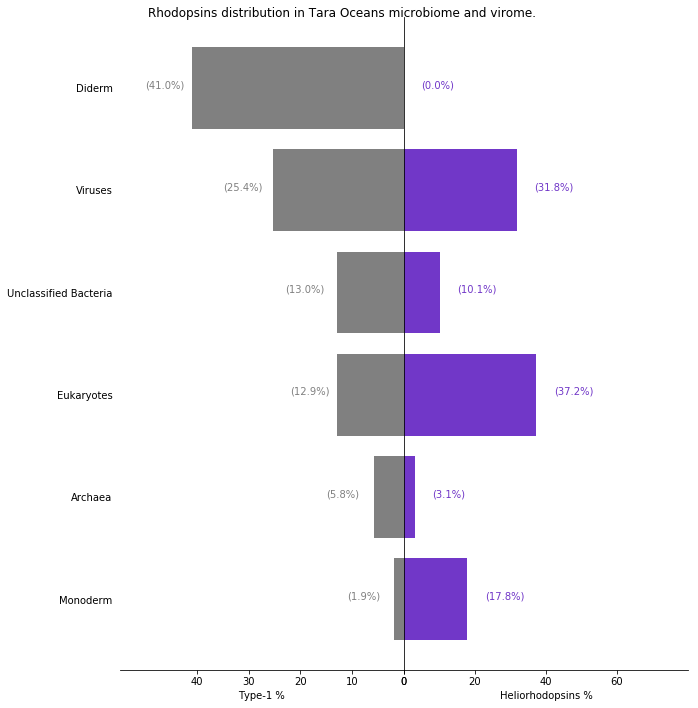

In [405]:
plot_df = df_1b

plot_df = plot_df.loc[~plot_df.plot_classification.isnull()]
plot_df = plot_df.loc[plot_df.rhod_type != "Unclassified"]
plot_df = plot_df.loc[~plot_df.plot_classification.isin(["Unclassified"])]

# add missing taxa
for rhod_type in ['helio', 'type_1']:
    for classification in plot_df.plot_classification.unique():
        if classification not in plot_df[(plot_df.rhod_type == rhod_type)]['plot_classification'].unique():
            plot_df = plot_df.append({'rhod_type':rhod_type, 'plot_classification':classification, 'count':0}, ignore_index=True)

classification_plot = plot_df

# count total number of helios from each type
classification_plot_count_df = classification_plot.groupby('rhod_type').agg(sum).reset_index().set_index('rhod_type')

# Calculate %
classification_plot.loc[classification_plot['rhod_type'] == 'helio', '%'] = \
classification_plot.loc[classification_plot['rhod_type'] == 'helio', 'count']*100/classification_plot_count_df.loc['helio','count']

classification_plot.loc[classification_plot['rhod_type'] == 'type_1', '%'] = \
classification_plot.loc[classification_plot['rhod_type'] == 'type_1', 'count']*100/classification_plot_count_df.loc['type_1','count']

# Sort DF
classification_plot.sort_values(by=["rhod_type", "%"], ascending=True, inplace=True)

# order of categories
categories = classification_plot.loc[classification_plot.rhod_type == "type_1"].sort_values(by="%", ascending=True)["plot_classification"].tolist()

classification_plot['plot_cat'] = pd.Categorical(classification_plot['plot_classification'], categories=categories, ordered=True)

classification_plot = classification_plot.sort_values('plot_cat')

g = sns.FacetGrid(data=classification_plot, \
                  col="rhod_type", \
                  hue="rhod_type", \
                  sharex=False, sharey=True, size=10, aspect=.5,palette=color_dict, col_order=["type_1", "helio"])
g = (g.map(plt.barh, "plot_classification", "%").set_titles(""))


g.fig.subplots_adjust(hspace=0, wspace=0)

# axis containers
helio_ax = g.axes[0][1]
type1_ax = g.axes[0][0]

#modify xlim to fit the labels
type1_ax.set_xlim(0,55)
helio_ax.set_xlim(0,80)

# # set x axis ticks
helio_ax.set_xticks([0,20,40,60]);
type1_ax.set_xticks([0,10,20,30,40]);
#helio_ax.set_xticks([0,50,100,150,200]);

# #set labels
helio_ax.set_ylabel('')
type1_ax.set_ylabel('')
helio_ax.set_xlabel('Heliorhodopsins %');
type1_ax.set_xlabel('Type-1 %');


#annotate the bars
for p in helio_ax.patches:
    helio_ax.annotate("({0:.1f}%)".format(p.get_width()), \
                      (p.get_width()+5, p.get_xy()[1]+(p.get_height())/2), color='#7137c8')
for p in type1_ax.patches:
    type1_ax.annotate("({0:.1f}%)".format(p.get_width()), \
                      (int(p.get_width())+10, p.get_xy()[1]+(p.get_height())/2), color='gray')

# invert x axis on helios
type1_ax.invert_xaxis()

sns.despine(ax=type1_ax,left=True)

# #remove ticks
type1_ax.yaxis.set_ticks_position('none')
helio_ax.yaxis.set_ticks_position('none')

g.fig.suptitle('Rhodopsins distribution in Tara Oceans microbiome and virome.');

g.savefig("./results/Tara.pdf")